# Chen_Po Hao_HW1 

## Vertebral Column Data Set
Name: Po Hao Chen <br>
Github username: pohaoc29 <br>
USC ID: 4213309111

Package imports

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### (a) Download Data

Get the Vertebral Column Data Set from https://archive.ics.uci.edu/dataset/212/vertebral+column.
The data files are attached in homework-1-pohaoc29 package/data.

#### In this exercise, we only focus on a binary classification task NO=0 and AB=1, so I choose the file "column_2c.dat"(instead of "column_3c.dat") as a data set.

### (b) Pre-Processing and Exploratory Data Analysis

In [2]:
df = pd.read_csv('../data/vertebral+column/column_2C.dat', sep=' ',header=None) #Seperate the columns with a space, and not let the first row data to be the header.
df

,0,1,2,3,4,5,6
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


Since the data set has no header label, I add the header in each column to make the data readable.

In [3]:
#Set the columns name, because there is no columns name in original data.
df.columns = ['Pelvic_incidence', 'Pelvic_tilt', 'Lumbar_lordosis_angle', 'Sacral_slope', 'Pelvic_radius', 'Grade_on_spondylolisthesis', 'Class']
df.head()

,Pelvic_incidence,Pelvic_tilt,Lumbar_lordosis_angle,Sacral_slope,Pelvic_radius,Grade_on_spondylolisthesis,Class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


I change the class label as required, NO=0, AB=1.

In [4]:
df.loc[df.Class == 'NO', 'Class'] = 0
df.loc[df.Class == 'AB', 'Class'] = 1
df.Class = df.Class.astype(int)

df

,Pelvic_incidence,Pelvic_tilt,Lumbar_lordosis_angle,Sacral_slope,Pelvic_radius,Grade_on_spondylolisthesis,Class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


#### i. Scatterplots

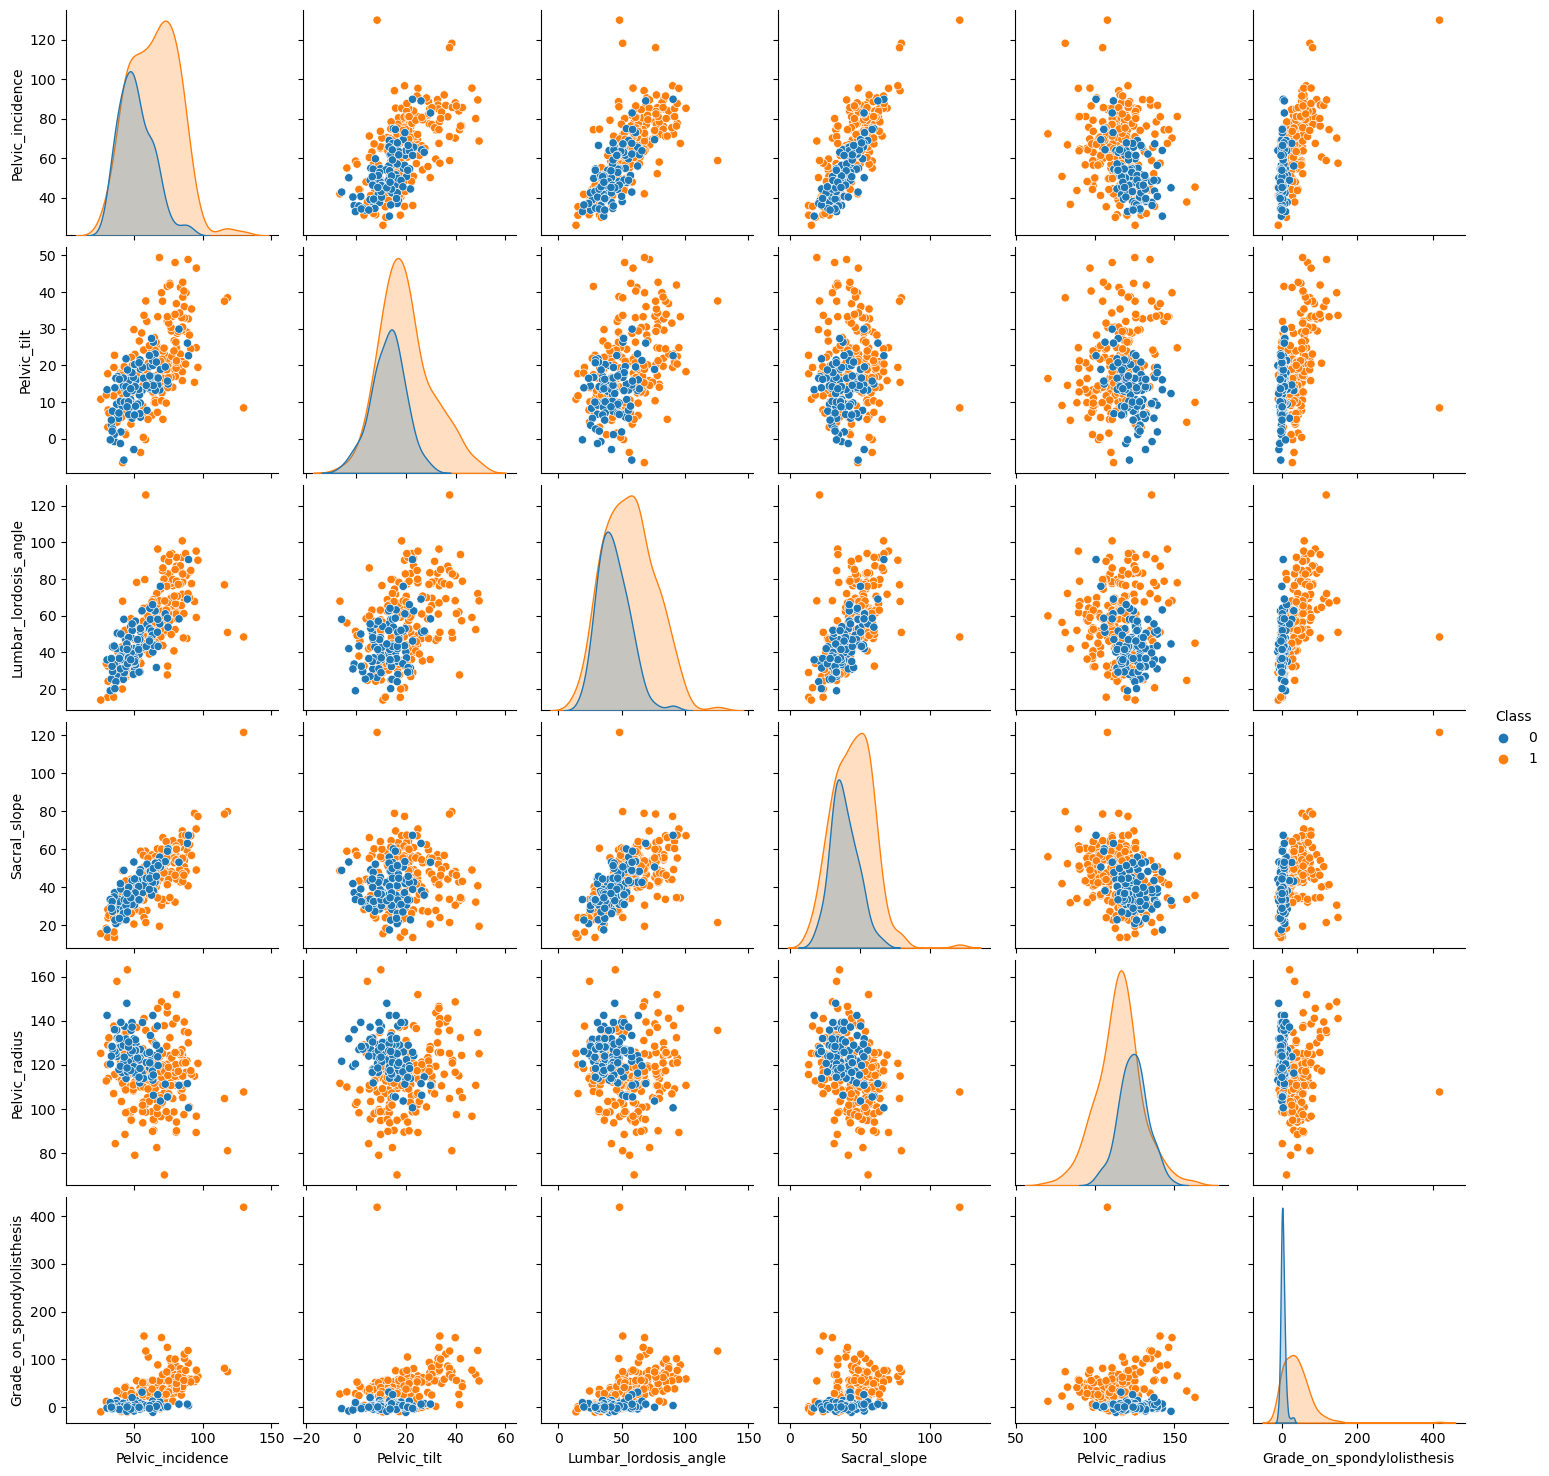

In [5]:
# using seaborn to plot the scatter plots
sns.pairplot(df, hue="Class")

#### ii. Boxplots

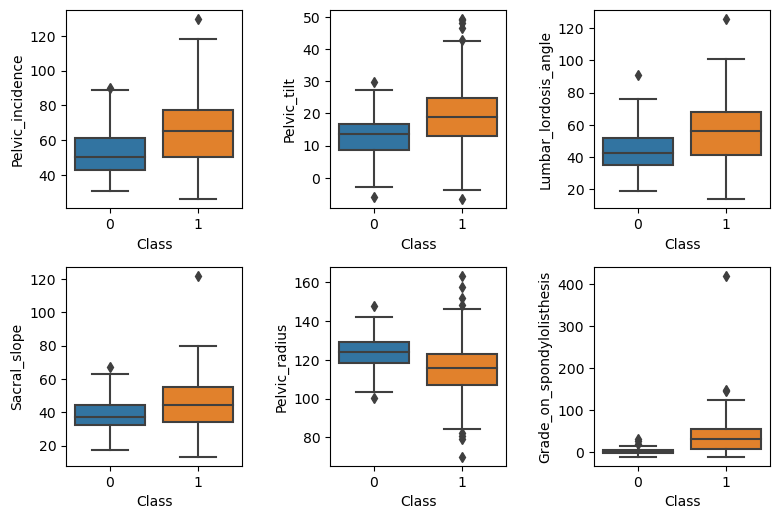

In [6]:
fig, axs = plt.subplots(2, 3)

sns.boxplot(ax=axs[0][0], data=df, x="Class", y="Pelvic_incidence")
sns.boxplot(ax=axs[0][1], data=df, x="Class", y="Pelvic_tilt")
sns.boxplot(ax=axs[0][2], data=df, x="Class", y="Lumbar_lordosis_angle")
sns.boxplot(ax=axs[1][0], data=df, x="Class", y="Sacral_slope")
sns.boxplot(ax=axs[1][1], data=df, x="Class", y="Pelvic_radius")
sns.boxplot(ax=axs[1][2], data=df, x="Class", y="Grade_on_spondylolisthesis")

fig.subplots_adjust(left=0.1, right=1.2, bottom=0.05, top=1.0,
                    hspace=0.3, wspace=0.5)


#### iii. Split Data Set

In [7]:
df['Class'].value_counts()

Class
1    210
0    100
Name: count, dtype: int64

In [8]:
dftrain = df.drop('Class', axis=1)
dfoutput = df.Class

Xtrain_set = pd.concat([dftrain[:140], dftrain[210:280]]) #Class1: 140, Class0: 70
Xtest_set = pd.concat([dftrain[140:210], dftrain[280:310]])
ytrain_set = pd.concat([dfoutput[:140], dfoutput[210:280]])
ytest_set = pd.concat([dfoutput[140:210], dfoutput[280:310]])


X_train = Xtrain_set 
X_test = Xtest_set
y_train = ytrain_set
y_test = ytest_set

### (c) Classification

#### i. Euclidean Metric

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knnEM = KNeighborsClassifier()

#### ii. Test Data

In [10]:
from sklearn.metrics import f1_score,precision_score
train_errors = list()
test_errors = list()
ks=list()

bestk = list()
best_test_error = 1

for k in range(208,0,-3):
    knnEM.set_params(n_neighbors=k)
    knnEM.fit(X_train, y_train)
    knnEMpred = knnEM.predict(X_test.values)
    
    train_error_rate = 1-knnEM.score(X_train.values, y_train)
    train_errors.append(train_error_rate)
    test_error_rate = 1-knnEM.score(X_test.values, y_test)
    test_errors.append(test_error_rate)
    
    ks.append(k)
    print("k =",k)
    print("Train error rate: ", train_error_rate)
    print("Test error rate: ", test_error_rate)
    print()
    
    # Specify the best k base on the test error rate
    if(test_error_rate < best_test_error):
        bestk.clear()
        best_test_error = test_error_rate
        bestk.append(k)
    elif(test_error_rate == best_test_error):
        bestk.append(k)
    else:
        continue
        
print("\nbest k = ",bestk)
print("best test error rate = ", best_test_error)


k = 208
Train error rate:  0.33333333333333337
Test error rate:  0.30000000000000004

k = 205
Train error rate:  0.33333333333333337
Test error rate:  0.30000000000000004

k = 202
Train error rate:  0.33333333333333337
Test error rate:  0.30000000000000004

k = 199
Train error rate:  0.33333333333333337
Test error rate:  0.30000000000000004

k = 196
Train error rate:  0.33333333333333337
Test error rate:  0.30000000000000004

k = 193
Train error rate:  0.33333333333333337
Test error rate:  0.30000000000000004

k = 190
Train error rate:  0.33333333333333337
Test error rate:  0.30000000000000004

k = 187
Train error rate:  0.33333333333333337
Test error rate:  0.30000000000000004

k = 184
Train error rate:  0.33333333333333337
Test error rate:  0.30000000000000004

k = 181
Train error rate:  0.33333333333333337
Test error rate:  0.30000000000000004

k = 178
Train error rate:  0.33333333333333337
Test error rate:  0.30000000000000004

k = 175
Train error rate:  0.33333333333333337
Test er

Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order).

Text(0, 0.5, 'Performance')

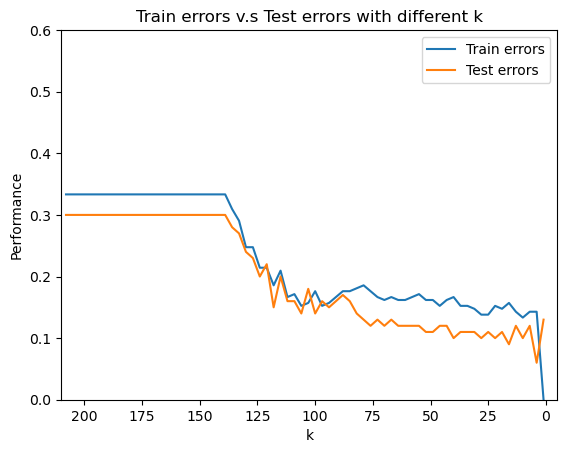

In [11]:
plt.plot(ks, train_errors, label="Train errors")
plt.plot(ks, test_errors, label="Test errors")

plt.title("Train errors v.s Test errors with different k")
plt.legend()
plt.xlim([210, -5])
plt.ylim([0, 0.6])
plt.xlabel("1/k")
plt.ylabel("Performance")

#### when k=4 has the lowest test error rate, so k=4 is the most suitable k among these value.

In [12]:
# The optimal k, k=4
print("We got the most suitable k in the previous cell:")
print("best k = ",bestk[0])
print("best test error rate = ", best_test_error)

k=bestk[0]
knnEM.set_params(n_neighbors=k)
knnEM.fit(X_train, y_train)
knnEMpred = knnEM.predict(X_test.values)

    
cm=confusion_matrix(y_test, knnEMpred)
TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TP=cm[1][1]
    
TPR=TP/(TP+FN)
TNR=TN/(TN+FP)
print("Confusion Matrix: \n", cm)
print("True positive rate: ", TPR) #TPR=TP/(TP+FN)
print("True negative rate: ", TNR) #TNR=TN/(TN+FP)
print("Precision: ", precision_score(y_test, knnEMpred)) 
print("F1-score: ",f1_score(y_test, knnEMpred))

We got the most suitable k in the previous cell:
best k =  4
best test error rate =  0.06000000000000005
Confusion Matrix: 
 [[25  5]
 [ 1 69]]
True positive rate:  0.9857142857142858
True negative rate:  0.8333333333333334
Precision:  0.9324324324324325
F1-score:  0.9583333333333333


#### iii. Learning Curve

In [13]:
Ns = list()
Best_testerrors_eachN = list()

for N in range(10,211,10):
    X_train = pd.concat([Xtrain_set[:(N-math.floor(N/3))], Xtrain_set[140:140+(math.floor(N/3))]])
    X_test = Xtest_set
    y_train = pd.concat([ytrain_set[:(N-math.floor(N/3))], ytrain_set[140:140+(math.floor(N/3))]])
    y_test = ytest_set
    
    Ns.append(N)
    
    optk = list()
    LCtest_errors = list()
    Best_test_error = 1
    for k in range(1,N,5):
        knnEM.set_params(n_neighbors=k)
        knnEM.fit(X_train, y_train)
        knnEMpred = knnEM.predict(X_test.values)
        
        LCtest_error_rate = 1-knnEM.score(X_test.values, y_test)
        LCtest_errors.append(LCtest_error_rate)
        
        print(f"N = {N}, k = {k}")
        print("Test error rate: ", LCtest_error_rate)

        #find the optimal k
        if(LCtest_error_rate < Best_test_error):
            optk.clear()
            Best_test_error = LCtest_error_rate
            optk.append(k)
        elif(LCtest_error_rate == Best_test_error):
            optk.append(k)
        else:
            continue
    if(len(optk)==1):
        print("The optimal k is: ", optk[0])
    else:
        print("The optimal k are: ", str(optk)[1:-1])
    
    Best_testerrors_eachN.append(np.min(LCtest_errors))
    print("Best test error rate:", np.min(LCtest_errors))
    print()
        

N = 10, k = 1
Test error rate:  0.25
N = 10, k = 6
Test error rate:  0.32999999999999996
The optimal k is:  1
Best test error rate: 0.25

N = 20, k = 1
Test error rate:  0.21999999999999997
N = 20, k = 6
Test error rate:  0.19999999999999996
N = 20, k = 11
Test error rate:  0.29000000000000004
N = 20, k = 16
Test error rate:  0.30000000000000004
The optimal k is:  6
Best test error rate: 0.19999999999999996

N = 30, k = 1
Test error rate:  0.21999999999999997
N = 30, k = 6
Test error rate:  0.24
N = 30, k = 11
Test error rate:  0.26
N = 30, k = 16
Test error rate:  0.26
N = 30, k = 21
Test error rate:  0.30000000000000004
N = 30, k = 26
Test error rate:  0.30000000000000004
The optimal k is:  1
Best test error rate: 0.21999999999999997

N = 40, k = 1
Test error rate:  0.76
N = 40, k = 6
Test error rate:  0.30000000000000004
N = 40, k = 11
Test error rate:  0.25
N = 40, k = 16
Test error rate:  0.26
N = 40, k = 21
Test error rate:  0.30000000000000004
N = 40, k = 26
Test error rate:  0.

N = 130, k = 71
Test error rate:  0.28
N = 130, k = 76
Test error rate:  0.30000000000000004
N = 130, k = 81
Test error rate:  0.30000000000000004
N = 130, k = 86
Test error rate:  0.30000000000000004
N = 130, k = 91
Test error rate:  0.30000000000000004
N = 130, k = 96
Test error rate:  0.30000000000000004
N = 130, k = 101
Test error rate:  0.30000000000000004
N = 130, k = 106
Test error rate:  0.30000000000000004
N = 130, k = 111
Test error rate:  0.30000000000000004
N = 130, k = 116
Test error rate:  0.30000000000000004
N = 130, k = 121
Test error rate:  0.30000000000000004
N = 130, k = 126
Test error rate:  0.30000000000000004
The optimal k is:  16
Best test error rate: 0.16000000000000003

N = 140, k = 1
Test error rate:  0.18000000000000005
N = 140, k = 6
Test error rate:  0.18000000000000005
N = 140, k = 11
Test error rate:  0.20999999999999996
N = 140, k = 16
Test error rate:  0.15000000000000002
N = 140, k = 21
Test error rate:  0.19999999999999996
N = 140, k = 26
Test error r

N = 180, k = 161
Test error rate:  0.30000000000000004
N = 180, k = 166
Test error rate:  0.30000000000000004
N = 180, k = 171
Test error rate:  0.30000000000000004
N = 180, k = 176
Test error rate:  0.30000000000000004
The optimal k are:  6, 16
Best test error rate: 0.09999999999999998

N = 190, k = 1
Test error rate:  0.14
N = 190, k = 6
Test error rate:  0.08999999999999997
N = 190, k = 11
Test error rate:  0.12
N = 190, k = 16
Test error rate:  0.09999999999999998
N = 190, k = 21
Test error rate:  0.10999999999999999
N = 190, k = 26
Test error rate:  0.10999999999999999
N = 190, k = 31
Test error rate:  0.10999999999999999
N = 190, k = 36
Test error rate:  0.10999999999999999
N = 190, k = 41
Test error rate:  0.10999999999999999
N = 190, k = 46
Test error rate:  0.10999999999999999
N = 190, k = 51
Test error rate:  0.13
N = 190, k = 56
Test error rate:  0.13
N = 190, k = 61
Test error rate:  0.15000000000000002
N = 190, k = 66
Test error rate:  0.14
N = 190, k = 71
Test error rate:

plot

Text(0, 0.5, 'best error rate of each N')

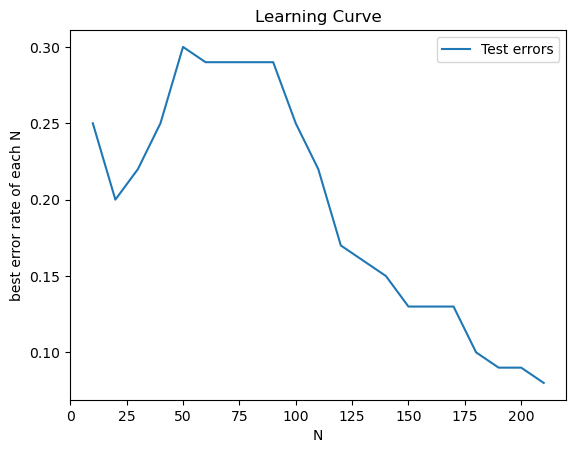

In [14]:
plt.plot(Ns, Best_testerrors_eachN, label="Test errors")

plt.title("Learning Curve")
plt.legend()
plt.xlim([0, 220])
plt.xlabel("N")
plt.ylabel("best error rate of each N")

### (d) Other Metrics

### i. Minkowski Distance.

#### A. Manhatten Distance with p = 1.

In [15]:
X_train = Xtrain_set 
X_test = Xtest_set
y_train = ytrain_set
y_test = ytest_set

MD_best_error = 1
MDbestk = list()

ks = list()
error_list = list()

knnMD = KNeighborsClassifier(p=1) #set p=1 to make the classifier apply Mangattan Distance


for k in range(1,200,5):
    knnMD.set_params(n_neighbors=k)
    knnMD.fit(X_train, y_train)
    knnMDpred = knnMD.predict(X_test.values)
    
#     train_errors.append(1-knnEM.score(X_train.values, y_train))
#     test_errors.append(1-knnEM.score(X_test.values, y_test))
    
    
    ks.append(k)
    #print("k =",k)
    error_rate = 1-knnMD.score(X_test.values,y_test)
    error_list.append(error_rate)
    #print("error rate: ",error_rate)
    
    if(error_rate < MD_best_error):
        MDbestk.clear()
        MD_best_error = error_rate
        MDbestk.append(k)
    elif(error_rate == MD_best_error):
        MDbestk.append(k)
    else:
        continue
        
print("best k = ",MDbestk)
print("best error rate = ", MD_best_error)

best k =  [6, 11, 26]
best error rate =  0.10999999999999999


Usually, theoratically as well, the smaller one(6) of these three ks(6, 11, 26) would be the best k.

The test errors summary table is shown as follows.

In [16]:
data = np.array([ks,error_list])

#table
table = pd.DataFrame(data.transpose(), columns=['k','Test errors'])
table.k = table.k.astype(int)
pd.set_option('display.float_format', '{:.20f}'.format)
table = table.set_index('k')

table

,Test errors
k,
1,0.11999999999999999556
6,0.10999999999999998668
11,0.10999999999999998668
16,0.11999999999999999556
21,0.11999999999999999556
26,0.10999999999999998668
31,0.11999999999999999556
36,0.13000000000000000444
41,0.13000000000000000444


#### B. With log10(p) in {0.1, 0.2, 0.3, ..., 1}. 
Just in case, I try the three best ks in the previous cell.

In [17]:
#k=6,11,26
X_train = Xtrain_set 
X_test = Xtest_set
y_train = ytrain_set
y_test = ytest_set
ps = list()
bestks=[6,11,26]

bestlogp = list()
Logp_bestk = list()
best_p = list()
Logp_best_error = 1
Logp_error_list=list()

for i in range(1, 11):
    j = math.pow(10,i/10)
    knnMDlog = KNeighborsClassifier(p=j)
    ps.append(j)
    #print("p = ",j)
    
    for k in [6,11,26]:
        knnMDlog.set_params(n_neighbors=k)
        knnMDlog.fit(X_train, y_train)
        knnMDlogpred = knnMDlog.predict(X_test.values)
        #print("k =",k)
        logp_error_rate = 1-knnMDlog.score(X_test.values,y_test)
        Logp_error_list.append(logp_error_rate)
        #print("error rate: ",logp_error_rate)

        
        if(logp_error_rate < Logp_best_error):
            bestlogp.clear()
            best_p.clear()
            Logp_bestk.clear()
            Logp_best_error = logp_error_rate
            bestlogp.append(i/10)
            best_p.append(j)
            Logp_bestk.append(k)
        elif(logp_error_rate == Logp_best_error):
            Logp_bestk.append(k)
        else:
            continue

print("when log10(p) = ", bestlogp)
print("best p = ", best_p)
print("best k = ", Logp_bestk)
print("best error = ", Logp_best_error)
print()  

when log10(p) =  [0.6]
best p =  [3.9810717055349722]
best k =  [6]
best error =  0.06000000000000005



#### when k=6, log10(p)=0.6, has the best error rate = 0.06000000000000005

Table for all log10(p) in (d)iB.

In [18]:
import decimal
logpdata = np.array([bestks*10,Logp_error_list])


#table
logptable = pd.DataFrame(logpdata.transpose(), columns=['k','Test errors'])
logptable.k = logptable.k.astype(int)
pd.set_option('display.float_format', '{:.17f}'.format)

log10p = list()
ps30 = list()
for i in range(10):
    for j in range(3):
        log10p.append(decimal.Decimal(i+1)/10)
        ps30.append(ps[i])
    

logptable.insert(0,'log10(p)', log10p)
logptable.insert(1, "p", ps30)


logptable

,log10(p),p,k,Test errors
0,0.1,1.25892541179416728,6,0.08999999999999997
1,0.1,1.25892541179416728,11,0.10999999999999999
2,0.1,1.25892541179416728,26,0.09999999999999998
3,0.2,1.58489319246111360,6,0.08999999999999997
4,0.2,1.58489319246111360,11,0.10999999999999999
5,0.2,1.58489319246111360,26,0.09999999999999998
6,0.3,1.99526231496887951,6,0.07999999999999996
7,0.3,1.99526231496887951,11,0.12000000000000000
8,0.3,1.99526231496887951,26,0.10999999999999999
9,0.4,2.51188643150958013,6,0.07999999999999996


#### C.Chebyshev Distance With p -> infinity.

In [19]:
X_train = Xtrain_set 
X_test = Xtest_set
y_train = ytrain_set
y_test = ytest_set

CsDbestk = list()
CsD_error_list = list()
CsD_best_error = 1
ks = list()

knnCsD = KNeighborsClassifier(p=math.inf)
 
for k in range(1,200,5):
    knnCsD.set_params(n_neighbors=k)
    knnCsD.fit(X_train, y_train)
    knnCsDpred = knnCsD.predict(X_test.values)
    
#     train_errors.append(1-knnEM.score(X_train.values, y_train))

    
    ks.append(k)
    #print("k =",k)
    error_rate = 1-knnCsD.score(X_test.values,y_test)
    CsD_error_list.append(error_rate)
    #print("error rate: ",error_rate)
    
    
    if(error_rate < CsD_best_error):
        CsDbestk.clear()
        CsD_best_error = error_rate
        CsDbestk.append(k)
    elif(error_rate == CsD_best_error):
        CsDbestk.append(k)
    else:
        continue
        
print("best k = ",CsDbestk)
print("best error rate = ", CsD_best_error)


best k =  [16]
best error rate =  0.07999999999999996


In [20]:
CDdata = np.array([ks,CsD_error_list])

#table
CDtable = pd.DataFrame(CDdata.transpose(), columns=['k','Test errors'])
CDtable.k = CDtable.k.astype(int)
pd.set_option('display.float_format', '{:.17f}'.format)
CDtable = CDtable.set_index('k')

CDtable

,Test errors
k,
1,0.13000000000000000
6,0.09999999999999998
11,0.12000000000000000
16,0.07999999999999996
21,0.10999999999999999
26,0.12000000000000000
31,0.12000000000000000
36,0.09999999999999998
41,0.13000000000000000


#### ii. Mahalanobis Distance.

In [21]:
from sklearn.metrics import DistanceMetric

X_train = Xtrain_set 
X_test = Xtest_set
y_train = ytrain_set
y_test = ytest_set

ks = list()
MaD_train_error_list = list()
MaD_error_list = list()
MaDbestk = list()
MaD_best_error = 1

#DistanceMetric.get_metric('mahalanobis', V=np.cov(X_trian))

knnMaD = KNeighborsClassifier(metric='mahalanobis',metric_params={'VI': np.linalg.inv(np.cov(np.transpose(X_train)))}) #set Magakanobis Distance


for k in range(1,200,5):
    knnMaD.set_params(n_neighbors=k)
    knnMaD.fit(X_train, y_train)
    #knnMaDpred = knnMaD.predict(X_test.values)
    
    
    ks.append(k)
    #print("k =",k)
    MaD_train_error = 1-knnMaD.score(X_train.values, y_train)
    MaD_train_error_list.append(MaD_train_error)
    MaD_test_error = 1-knnMaD.score(X_test.values,y_test)
    MaD_error_list.append(MaD_test_error)
    #print("Test error rate: ", MaD_test_error)
    
    if(MaD_test_error < MaD_best_error):
        MaDbestk.clear()
        MaD_best_error = MaD_test_error
        MaDbestk.append(k)
    elif(MaD_test_error == MaD_best_error):
        MaDbestk.append(k)
    else:
        continue
        
print("best k = ",MaDbestk)
print("best error rate = ", MaD_best_error)

best k =  [1, 6]
best error rate =  0.17000000000000004


In [22]:
MaDdata = np.array([ks,MaD_error_list])

#table
MaDtable = pd.DataFrame(MaDdata.transpose(), columns=['k','Test errors'])
MaDtable.k = MaDtable.k.astype(int)
pd.set_option('display.float_format', '{:.17f}'.format)
MaDtable = MaDtable.set_index('k')

MaDtable

,Test errors
k,
1,0.17000000000000004
6,0.17000000000000004
11,0.19999999999999996
16,0.19999999999999996
21,0.20999999999999996
26,0.19999999999999996
31,0.22999999999999998
36,0.20999999999999996
41,0.23999999999999999


#### Plot to compare train error with test error, determine witch is the best k.

Text(0, 0.5, 'test error rate of each k')

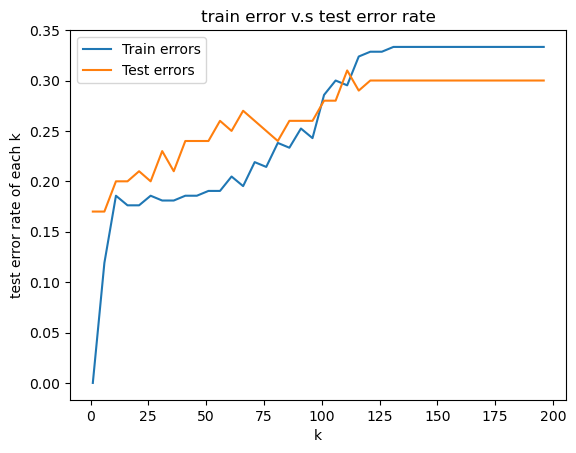

In [23]:
plt.plot(ks, MaD_train_error_list, label="Train errors")
plt.plot(ks, MaD_error_list, label="Test errors")

plt.title("train error v.s test error rate")
plt.legend()
plt.xlabel("k")
plt.ylabel("test error rate of each k")

#### When k=1, the training error rate is dramatically low, and the gap between the training error and test error is enormous, so it is reasonable that to believe when k=1 the model is overfitting. Therefore, k=6 is the best k in this case.

### SUMMARY TABLE in (d)

In [24]:
Distance_metrics = ['Manhattan Distance', 'Chebyshev Distance', 'Mahalanobis Distance']
bestKs = np.array([MDbestk,CsDbestk, MaDbestk])
bestRates = [MD_best_error, CsD_best_error, MaD_best_error]

smry_data = np.array([Distance_metrics, bestKs, bestRates])

smry_table = pd.DataFrame(smry_data.transpose(), columns=['Distance Metric', 'the best k', 'the best test error'])

smry_table

,Distance Metric,the best k,the best test error
0,Manhattan Distance,"[6, 11, 26]",0.10999999999999999
1,Chebyshev Distance,[16],0.07999999999999996
2,Mahalanobis Distance,"[1, 6]",0.17000000000000004


According to previous analyze result, if "the best k" are required to be only one, I would choose k as table below.

In [25]:
Distance_metrics = ['Manhattan Distance', 'Chebyshev Distance', 'Mahalanobis Distance']
bestKs = [6,16,6]
bestRates = [MD_best_error, CsD_best_error, MaD_best_error]

smry_data = np.array([Distance_metrics, bestKs, bestRates])

smry_table = pd.DataFrame(smry_data.transpose(), columns=['Distance Metric', 'the best k', 'the best test error'])

smry_table

,Distance Metric,the best k,the best test error
0,Manhattan Distance,6,0.10999999999999999
1,Chebyshev Distance,16,0.07999999999999996
2,Mahalanobis Distance,6,0.17000000000000004


### (e) Weighted Decision

#### Euclidean distances

In [26]:
X_train = Xtrain_set 
X_test = Xtest_set
y_train = ytrain_set
y_test = ytest_set

ED_bestk = list()
ED_best_error = 1

for k in range(1,200,5):
    knnEM_w = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knnEM_w.fit(X_train, y_train)
    knnEM_w_pred = knnEM_w.predict(X_test)
    
    #print("k =",k)
    ED_error_rate = 1-knnEM_w.score(X_test.values,y_test)
    #print("error rate: ",ED_error_rate)

    if(ED_error_rate < ED_best_error):
        ED_bestk.clear()
        ED_best_error = ED_error_rate
        ED_bestk.append(k)
    elif(ED_error_rate == ED_best_error):
        ED_bestk.append(k)
    else:
        continue
        
print("\nbest k = ",ED_bestk)
print("best error rate = ", ED_best_error)


best k =  [6]
best error rate =  0.09999999999999998


#### Manhattan Distances

In [27]:
X_train = Xtrain_set 
X_test = Xtest_set
y_train = ytrain_set
y_test = ytest_set

MD_bestk = list()
MD_best_error = 1

for k in range(1,200,5):
    knnMD_w = KNeighborsClassifier(n_neighbors=k, weights='distance',p=1)
    knnMD_w.fit(X_train, y_train)
    knnMD_w_pred = knnMD_w.predict(X_test)
    
    #print("k =",k)
    MD_error_rate = 1-knnMD_w.score(X_test.values,y_test)
    #print("error rate: ",MD_error_rate)

    if(MD_error_rate < MD_best_error):
        MD_bestk.clear()
        MD_best_error = MD_error_rate
        MD_bestk.append(k)
    elif(MD_error_rate == MD_best_error):
        MD_bestk.append(k)
    else:
        continue
        
print("\nbest k = ",MD_bestk)
print("best error rate = ", MD_best_error)


best k =  [26]
best error rate =  0.09999999999999998


#### Chebyshev Distance

In [28]:
X_train = Xtrain_set 
X_test = Xtest_set
y_train = ytrain_set
y_test = ytest_set

CD_bestk = list()
CD_best_error = 1


for k in range(1,200,5):
    knnCD_w = KNeighborsClassifier(n_neighbors=k, weights='distance',p=math.inf)
    knnCD_w.fit(X_train, y_train)
    knnCD_w_pred = knnCD_w.predict(X_test)
    
    #print("k =",k)
    CD_error_rate = 1-knnCD_w.score(X_test.values,y_test)
    #print("error rate: ",CD_error_rate)

    if(CD_error_rate < CD_best_error):
        CD_bestk.clear()
        CD_best_error = CD_error_rate
        CD_bestk.append(k)
    elif(CD_error_rate == CD_best_error):
        CD_bestk.append(k)
    else:
        continue
        
print("\nbest k = ",CD_bestk)
print("best error rate = ", CD_best_error)


best k =  [16, 31, 36, 41, 61]
best error rate =  0.10999999999999999


### (f) Training Error Rate

The lowest training error rate I achieved in this homework is 0.0 when the k=1, and at the same time, the test error rate is high, which means the model overfits the training data.